In [8]:
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#(train_images, train_labels), (test_images, test_labels) =  mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
print(train_images[0].shape)

(32, 32, 3)


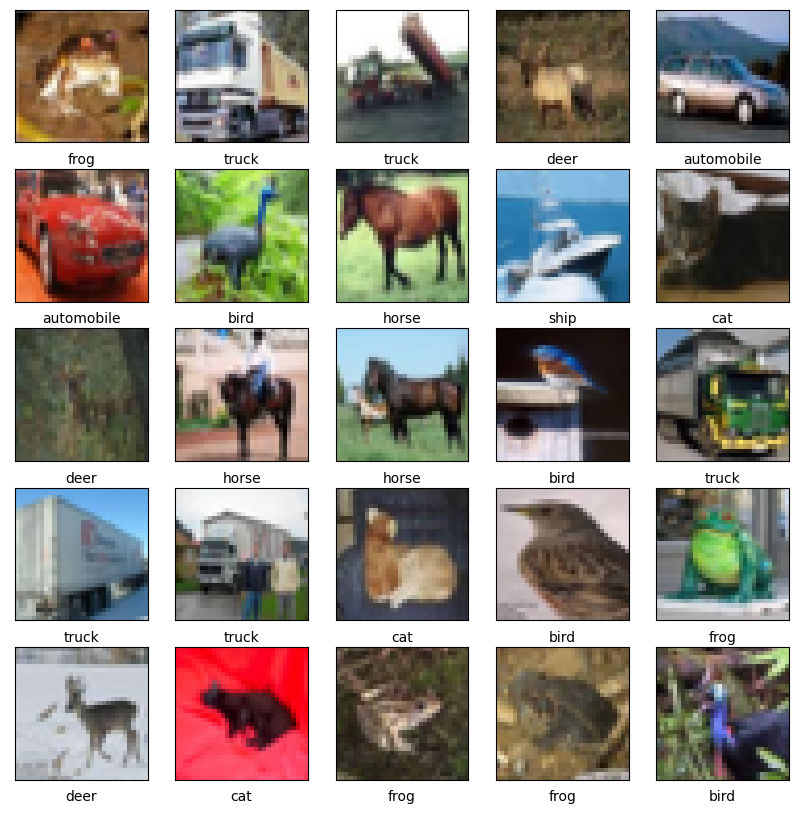

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [55]:
ResNet = models.Sequential()

model = ResNet50(include_top=False, pooling='avg', weights='imagenet')
for layer in model.layers:
    layer.trainable = False
    
ResNet.add(model)
ResNet.add(layers.Flatten())
ResNet.add(layers.BatchNormalization())
ResNet.add(layers.Dense(128, activation='relu'))
ResNet.add(layers.BatchNormalization())
ResNet.add(layers.Dense(64, activation='relu'))
ResNet.add(layers.BatchNormalization())
ResNet.add(layers.Dense(10, activation='softmax'))

In [59]:
ResNet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = ResNet.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 164s 103ms/step - loss: 1.6356 - accuracy: 0.4204 - val_loss: 1.5372 - val_accuracy: 0.4473
Epoch 2/5
1563/1563 [==============================] - 168s 108ms/step - loss: 1.5397 - accuracy: 0.4540 - val_loss: 1.4843 - val_accuracy: 0.4741
Epoch 3/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4945 - accuracy: 0.4725 - val_loss: 1.4648 - val_accuracy: 0.4796
Epoch 4/5
1563/1563 [==============================] - 166s 106ms/step - loss: 1.4621 - accuracy: 0.4839 - val_loss: 1.4497 - val_accuracy: 0.4859
Epoch 5/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.4383 - accuracy: 0.4923 - val_loss: 1.3986 - val_accuracy: 0.5041


In [60]:
ResNet.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_20 (Flatten)        (None, 2048)              0         
                                                                 
 batch_normalization_33 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_59 (Dense)            (None, 128)               262272    
                                                                 
 batch_normalization_34 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_60 (Dense)            (None, 64)              

313/313 - 20s - loss: 1.4469 - accuracy: 0.4911 - 20s/epoch - 62ms/step


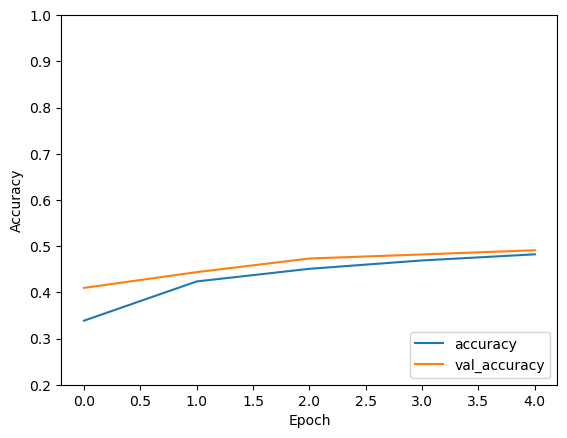

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = ResNet.evaluate(test_images,  test_labels, verbose=2)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 flatten_27 (Flatten)        (None, 10816)             0         
                                                                 
 dense_76 (Dense)            (None, 64)                692288    
                                                                 
 dense_77 (Dense)            (None, 10)                650       
                                                     

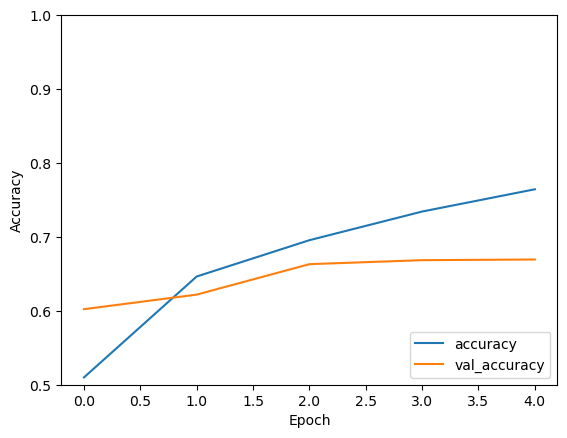

In [84]:
'''
model 2
'''
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

model2.summary()

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

In [67]:
model2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 flatten_23 (Flatten)        (None, 10816)             0         
                                                                 
 dense_66 (Dense)            (None, 64)                692288    
                                                                 
 dense_67 (Dense)            (None, 10)                650       
                                                     

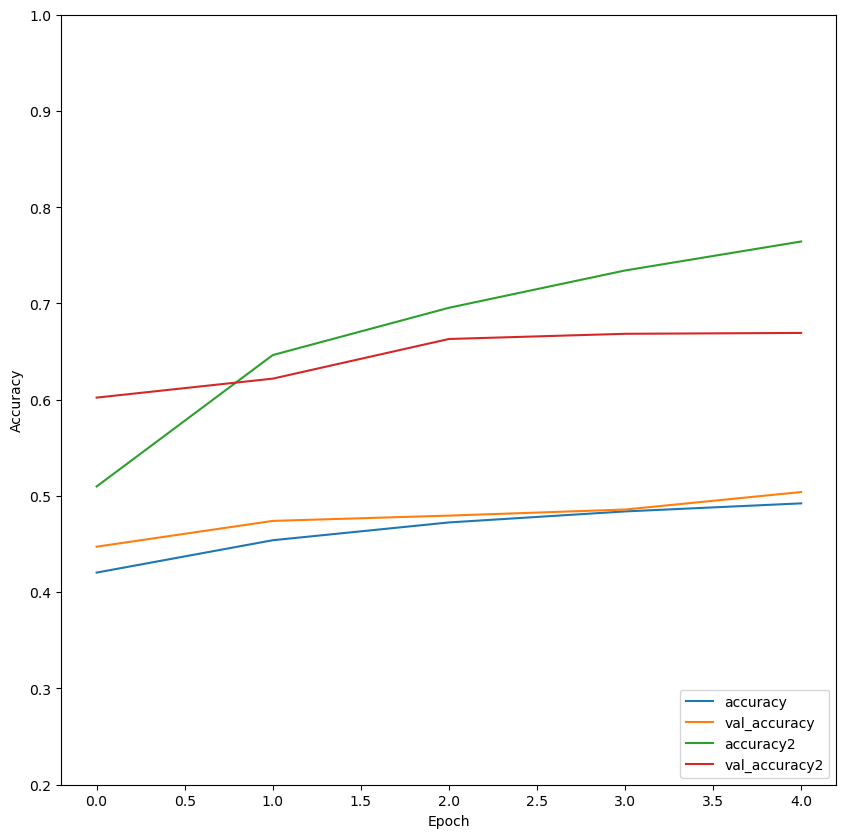

In [91]:
# Compare the 3 models
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history2.history['accuracy'], label='accuracy2')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.show()